# CIFAR-10 Image classification

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

# Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

170498071/170498071 [==============================] - 6s 0us/step
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


# Data Visualization

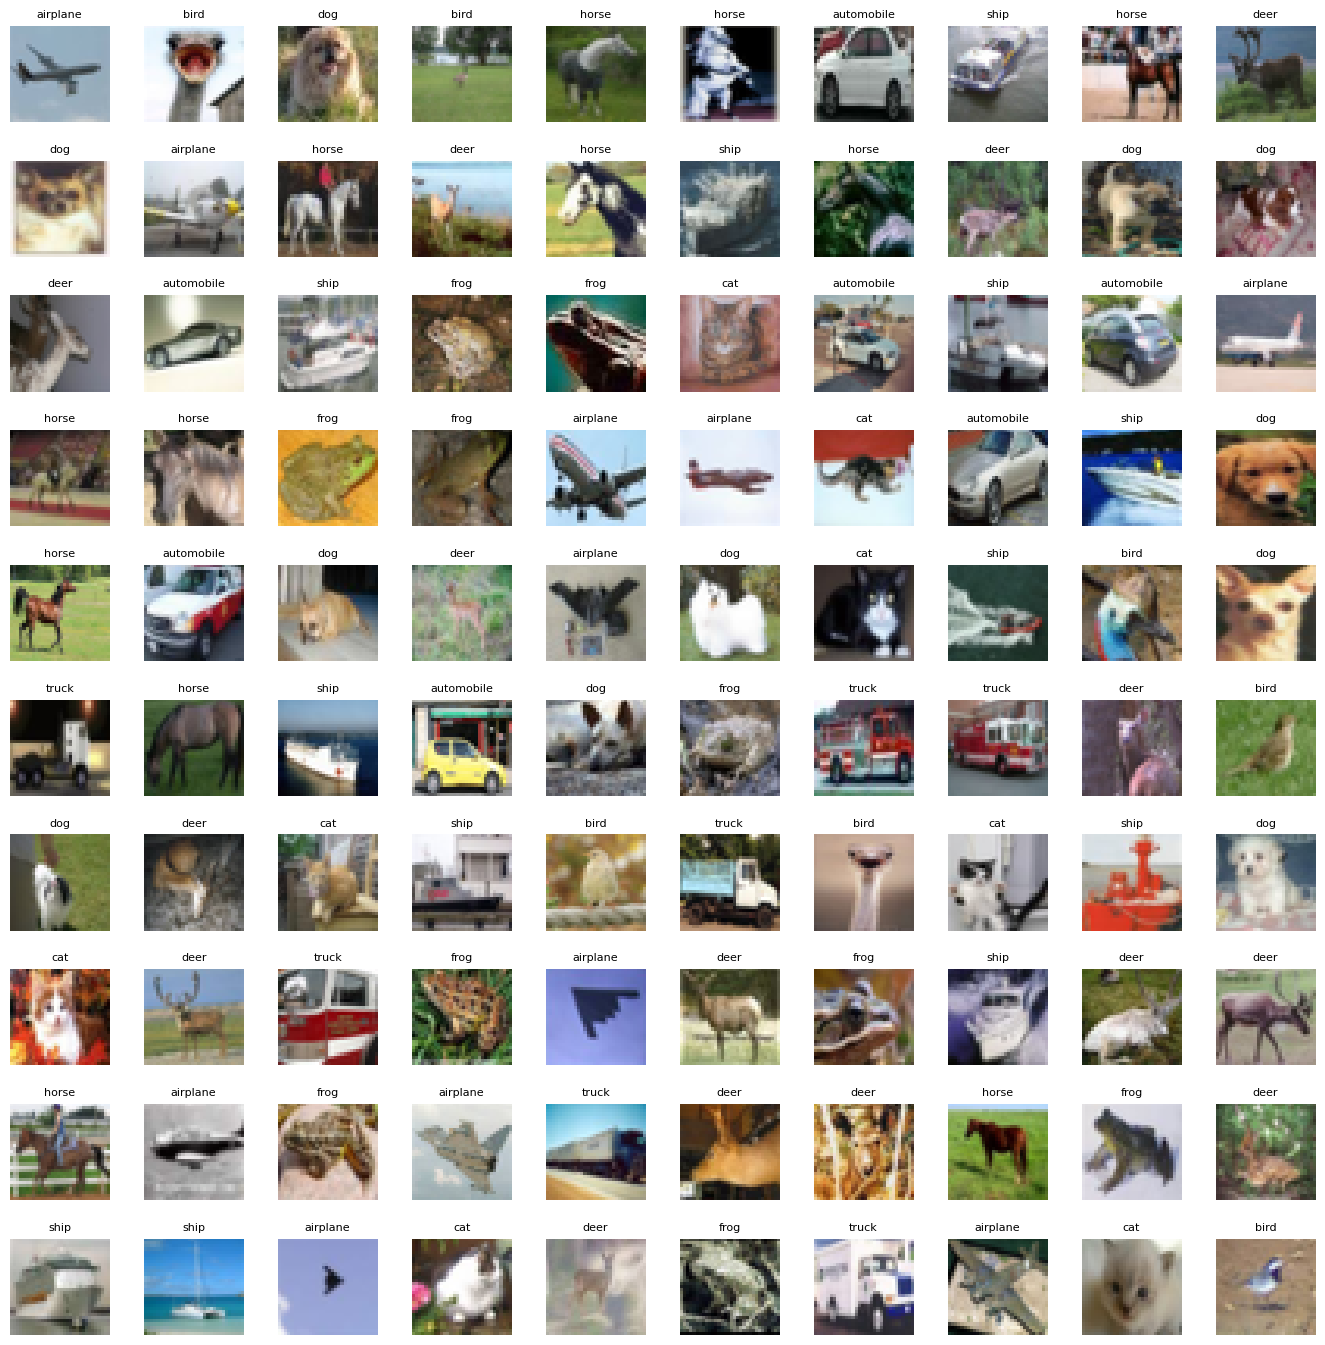

In [3]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 10
L_grid = 10

# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

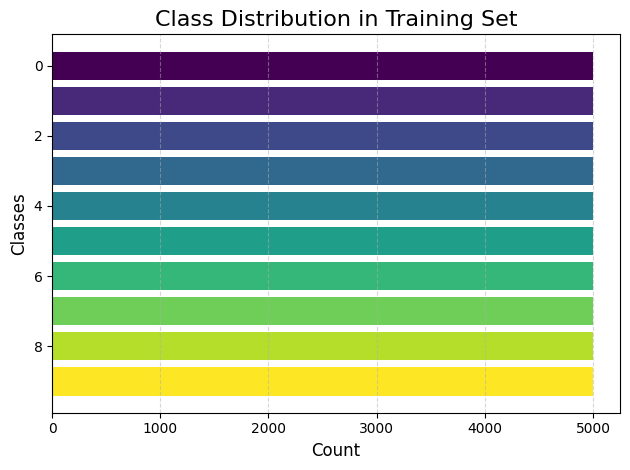

In [4]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)

plt.barh(classes, counts, color=plt.cm.viridis(np.linspace(0, 1, len(classes))))
plt.title('Class Distribution in Training Set', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Classes', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()


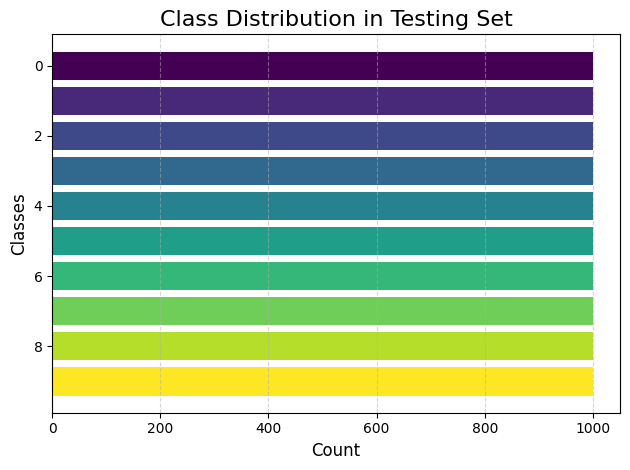

In [6]:
classes, counts = np.unique(y_test, return_counts=True)

plt.barh(classes, counts, color=plt.cm.viridis(np.linspace(0, 1, len(classes))))
plt.title('Class Distribution in Testing Set', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Classes', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

The class are equally distributed

# Data Preprocessing

In [7]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [8]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# Model Building

In [9]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [10]:
#model.summary()

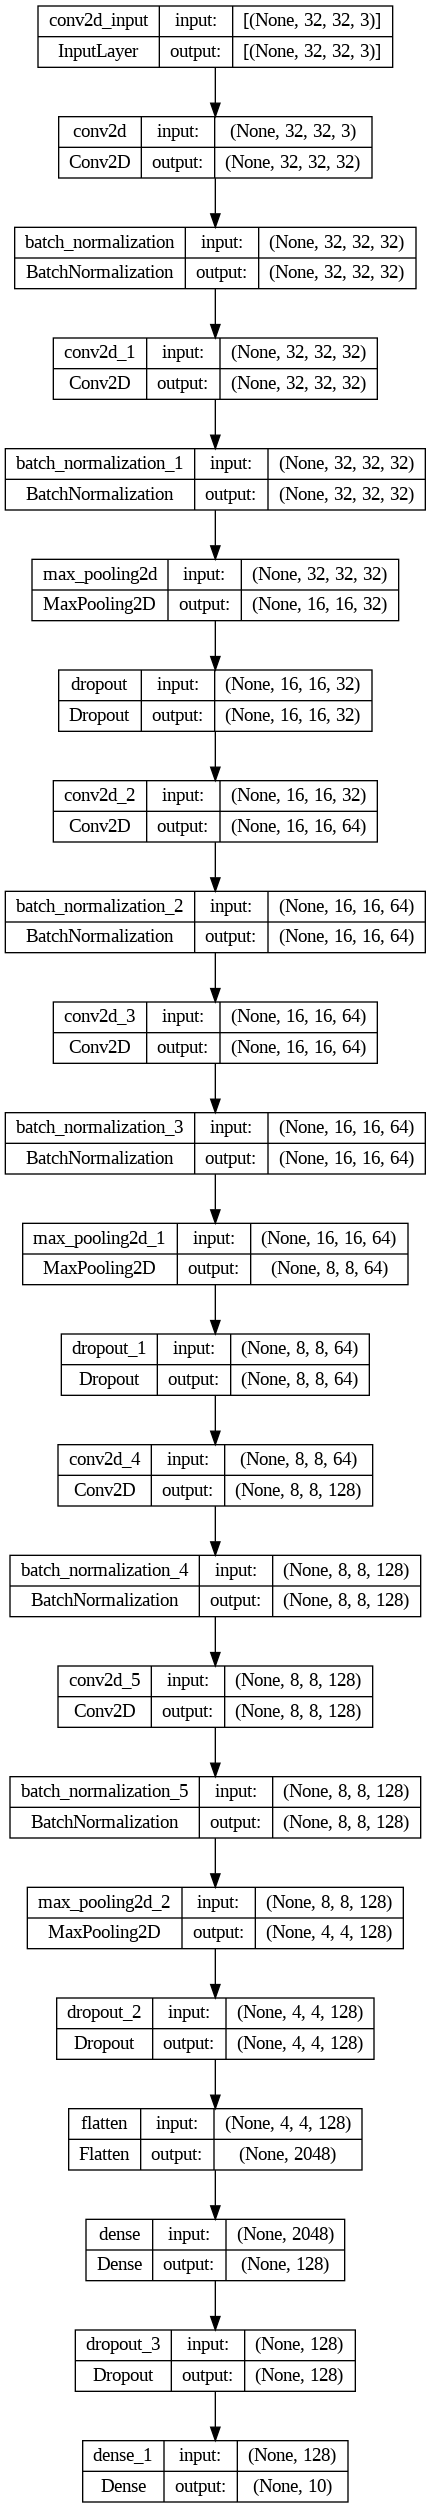

In [11]:
from keras.utils import plot_model
# Generate the model diagram
plot_model(model, show_shapes=True, show_layer_names=True, to_file='cnn_model.png')

## Early Stopping

In [12]:
#early_stop = EarlyStopping(monitor='val_loss', patience=2)

## Data Augmentations

In [14]:
batch_size = 128
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator,
              epochs=30,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test),
               #callbacks=[early_stop],
               batch_size=batch_size,
             )

Epoch 1/30
390/390 [==============================] - 31s 80ms/step - loss: 0.7551 - accuracy: 0.7392 - precision: 0.8291 - recall: 0.6556 - val_loss: 0.7098 - val_accuracy: 0.7617 - val_precision: 0.8305 - val_recall: 0.7027
Epoch 2/30
390/390 [==============================] - 32s 81ms/step - loss: 0.7170 - accuracy: 0.7518 - precision: 0.8349 - recall: 0.6754 - val_loss: 0.6777 - val_accuracy: 0.7696 - val_precision: 0.8410 - val_recall: 0.7057
Epoch 3/30
390/390 [==============================] - 30s 78ms/step - loss: 0.6835 - accuracy: 0.7641 - precision: 0.8416 - recall: 0.6908 - val_loss: 0.6318 - val_accuracy: 0.7846 - val_precision: 0.8495 - val_recall: 0.7279
Epoch 4/30
390/390 [==============================] - 31s 79ms/step - loss: 0.6521 - accuracy: 0.7760 - precision: 0.8500 - recall: 0.7083 - val_loss: 0.7046 - val_accuracy: 0.7637 - val_precision: 0.8211 - val_recall: 0.7131
Epoch 5/30
390/390 [==============================] - 31s 79ms/step - loss: 0.6260 - accuracy: 0

# Model Evaluation

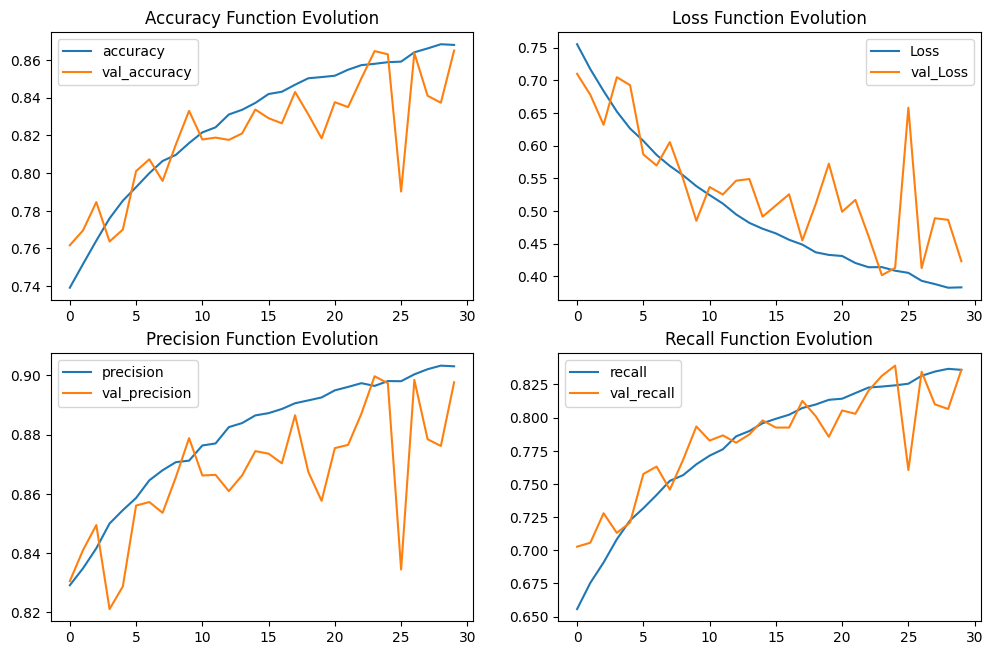

In [25]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

313/313 [==============================] - 2s 5ms/step - loss: 0.4228 - accuracy: 0.8650 - precision: 0.8977 - recall: 0.8360
Test Accuracy : 86.50%
313/313 [==============================] - 1s 2ms/step


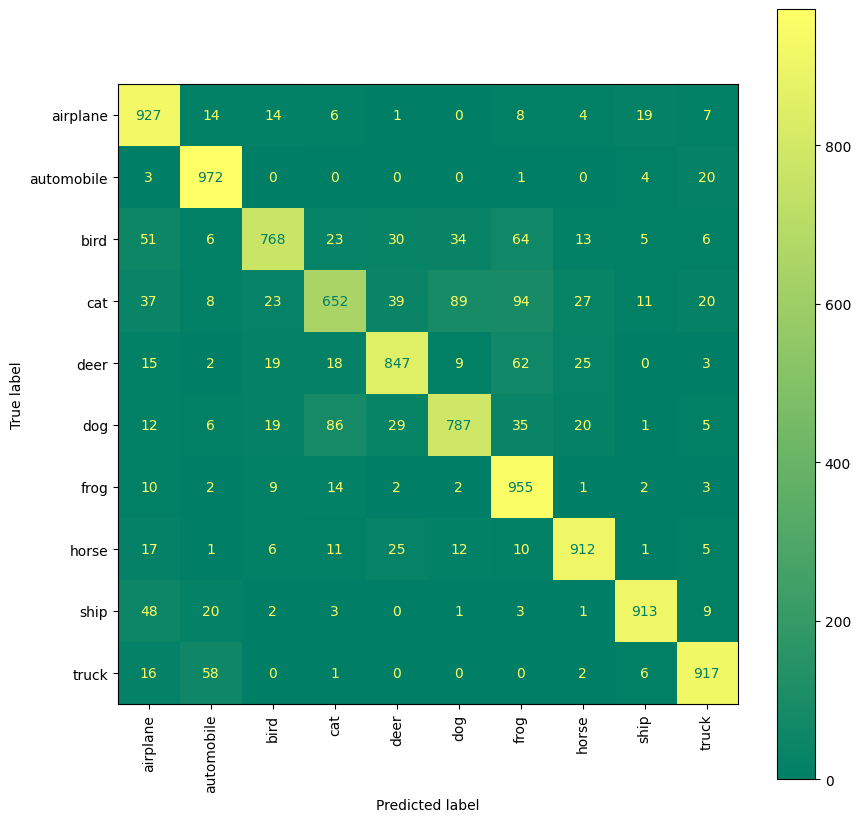

In [16]:
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1000
           1       0.89      0.97      0.93      1000
           2       0.89      0.77      0.83      1000
           3       0.80      0.65      0.72      1000
           4       0.87      0.85      0.86      1000
           5       0.84      0.79      0.81      1000
           6       0.78      0.95      0.86      1000
           7       0.91      0.91      0.91      1000
           8       0.95      0.91      0.93      1000
           9       0.92      0.92      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



## Test on one image

 Image 100 is [0]
1/1 [==============================] - 0s 21ms/step
The model predict that image 100 is 0


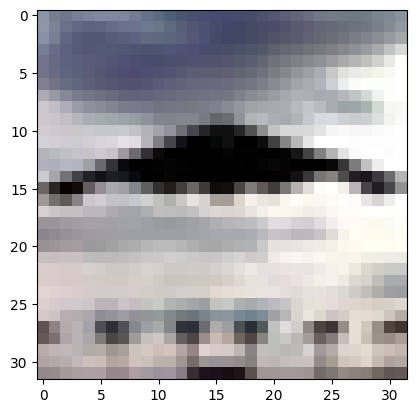

In [23]:
my_image = X_test[111]
plt.imshow(my_image)

# thats an airplaine
print(f" Image 100 is {y_test[111]}")

# correctly predicted as a Deer
pred_100 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_100}")

# Transfer learning using DenseNet model for image classification

In [24]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
base_model = DenseNet121(input_shape=(32, 32, 3), include_top=False, weights='imagenet', pooling='avg')
model.add(base_model)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

densenet = model.fit(train_generator,
              epochs=20,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test),
#               callbacks=[early_stop],
             )

29084464/29084464 [==============================] - 2s 0us/step
Epoch 1/20
390/390 [==============================] - 158s 181ms/step - loss: 0.9225 - accuracy: 0.6833 - precision: 0.8121 - recall: 0.6270 - val_loss: 0.9356 - val_accuracy: 0.7000 - val_precision: 0.7682 - val_recall: 0.6414
Epoch 2/20
390/390 [==============================] - 59s 151ms/step - loss: 0.5872 - accuracy: 0.7983 - precision: 0.8523 - recall: 0.7497 - val_loss: 0.9016 - val_accuracy: 0.7151 - val_precision: 0.7789 - val_recall: 0.6694
Epoch 3/20
390/390 [==============================] - 60s 154ms/step - loss: 0.4986 - accuracy: 0.8288 - precision: 0.8726 - recall: 0.7895 - val_loss: 0.6534 - val_accuracy: 0.7805 - val_precision: 0.8157 - val_recall: 0.7438
Epoch 4/20
390/390 [==============================] - 57s 145ms/step - loss: 0.5377 - accuracy: 0.8192 - precision: 0.8652 - recall: 0.7776 - val_loss: 0.6089 - val_accuracy: 0.7889 - val_precision: 0.8344 - val_recall: 0.7527
Epoch 5/20
390/390 [======

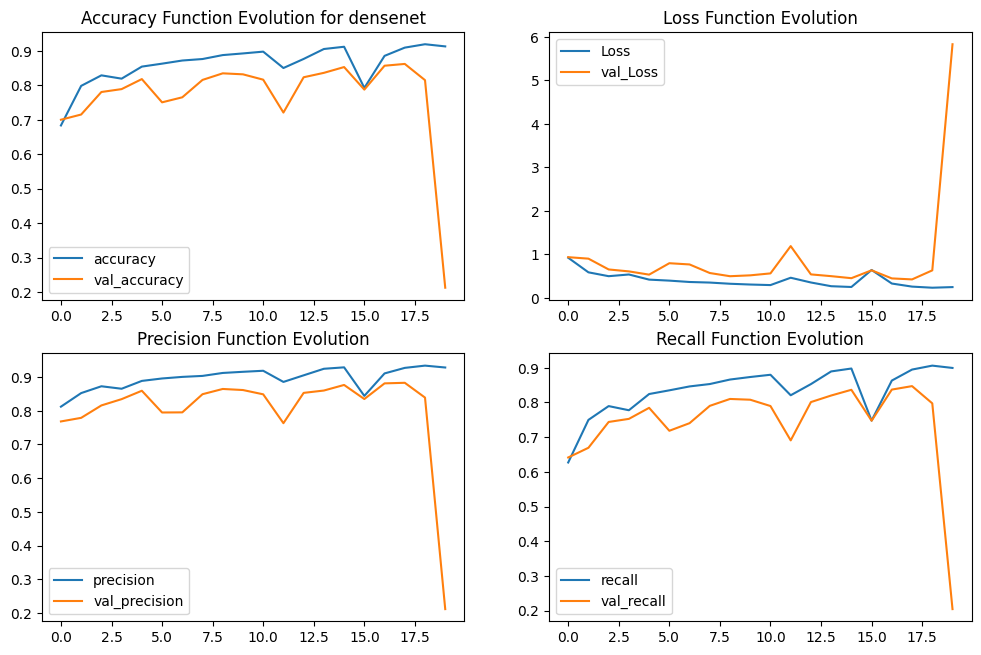

In [26]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(densenet.history['accuracy'], label='accuracy')
plt.plot(densenet.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution for densenet')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(densenet.history['loss'], label='Loss')
plt.plot(densenet.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(densenet.history['precision'], label='precision')
plt.plot(densenet.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(densenet.history['recall'], label='recall')
plt.plot(densenet.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

# Save the models

In [ ]:
from tensorflow.keras.models import load_model

model.save('cnn_20_epochs.h5')